# Fair Coin Experiment

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd



n = 10  # Number of coin flips
p = 0.5  # Probability of heads

x_values = np.arange(0, n + 1)

# Compute PMF using the binomial distribution
pmf_values = stats.binom.pmf(x_values, n, p)

# Compute CDF
cdf_values = stats.binom.cdf(x_values, n, p)

# Create a table for PMF and CDF
pmf_cdf_table = pd.DataFrame({
    "Number of Heads (X)": x_values,
    "PMF P(X=x)": pmf_values,
    "CDF F(b)": cdf_values
})

pmf_cdf_table.head(11)

,Number of Heads (X),PMF P(X=x),CDF F(b)
0,0,0.000977,0.000977
1,1,0.009766,0.010742
2,2,0.043945,0.054688
3,3,0.117188,0.171875
4,4,0.205078,0.376953
5,5,0.246094,0.623047
6,6,0.205078,0.828125
7,7,0.117187,0.945312
8,8,0.043945,0.989258
9,9,0.009766,0.999023


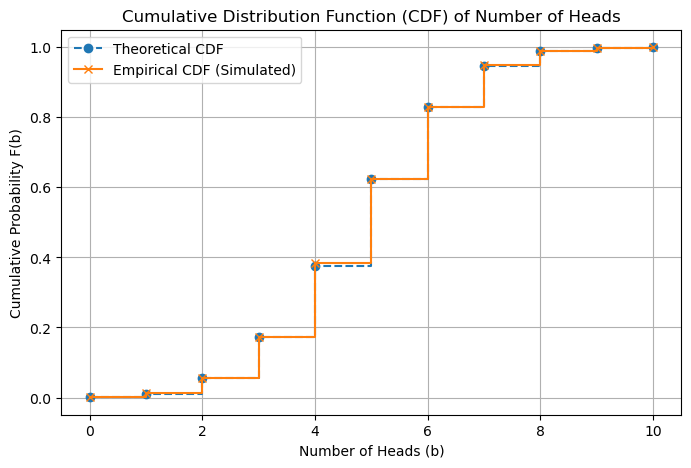

In [7]:

# Simulate the experiment
num_simulations = 10000
simulated_results = np.random.binomial(n, p, num_simulations)

# Compute empirical CDF
empirical_cdf = np.array([np.mean(simulated_results <= b) for b in x_values])

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.step(x_values, cdf_values, label="Theoretical CDF", where="post", linestyle="--", marker="o")
plt.step(x_values, empirical_cdf, label="Empirical CDF (Simulated)", where="post", linestyle="-", marker="x")
plt.xlabel("Number of Heads (b)")
plt.ylabel("Cumulative Probability F(b)")
plt.title("Cumulative Distribution Function (CDF) of Number of Heads")
plt.legend()
plt.grid(True)
plt.show()


# Antique Shop Sales

In [23]:
np.random.seed(42)

# Simulation parameters
days = 365
customer_min = 5
customer_max = 15

daily_sales = []

for _ in range(days):
    # Number of customers
    num_customers = np.random.randint(customer_min, customer_max + 1)

    purchase_types = np.random.choice(
        ["souvenir", "regular", "rare"], 
        size=num_customers, 
        p=[0.6, 0.3, 0.1]
    )
    
    # Generate sales based on purchase type
    sales = []
    for purchase in purchase_types:
        if purchase == "souvenir":
            sales.append(np.random.uniform(1, 50))
        elif purchase == "regular":
            sales.append(np.random.uniform(50, 200))
        else:  # rare item
            sales.append(np.random.uniform(200, 2000))
    
    # Total daily sales
    daily_sales.append(sum(sales))

daily_sales = np.array(daily_sales)
daily_sales

array([ 510.70770809, 1465.29125871, 4661.22994247, 2692.98285534,
        370.95173584,  498.40132027, 2064.97077835, 2627.67671371,
        617.87107853, 1986.25065223,  892.44642309, 1648.23173108,
       2717.48368307, 1599.80013662, 2000.80190685, 2168.65520248,
       1552.65094885,  923.81429214,  520.23734782,  493.06846056,
       1476.39347618, 1486.56427668, 4003.16132769, 3626.16853716,
       2222.56131255, 4958.65584602, 1434.55946846,  379.11013685,
       2153.01009626, 1284.14286377,  467.9796129 ,  495.31652624,
        737.78840968,  665.40583742, 4185.28237082,  162.61307054,
        566.28651685, 1057.87193471,  669.49479777,  512.65384635,
       1504.3577996 ,  824.41890664,  179.69809975, 3404.98684087,
        621.03284046,  234.04111369,  384.28498895, 2187.77273138,
        357.43894862, 2016.38796417, 1316.0809905 ,  242.20897391,
       4194.95862855, 7183.00790751,  962.41630028, 2317.9125826 ,
       1154.78148393,  682.67290936,  467.32342331, 1794.84624

In [24]:
# Estimate P(X > 10,000)
prob_x_gt_10000 = np.mean(daily_sales > 10000)
prob_x_gt_10000

0.0

In [29]:
bins = np.arange(0, max(daily_sales) + 1000, 1000)
hist, bin_edges = np.histogram(daily_sales, bins=bins, density=True)

cdf = np.cumsum(hist * np.diff(bin_edges))  # CDF calculation

sales_df = pd.DataFrame({"Sales Range": bin_edges[:-1], "Probability": hist, "Cumulative Probability": cdf})
sales_df

,Sales Range,Probability,Cumulative Probability
0,0.0,0.000436,0.435616
1,1000.0,0.000236,0.671233
2,2000.0,0.000186,0.857534
3,3000.0,0.000107,0.964384
4,4000.0,0.000027,0.991781
5,5000.0,0.000003,0.994521
6,6000.0,0.000000,0.994521
7,7000.0,0.000005,1.000000


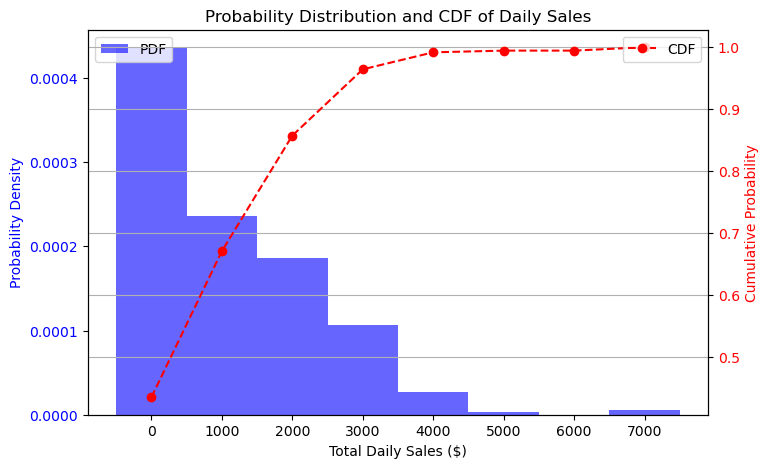

0.0

In [30]:

fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot PDF
ax1.bar(bin_edges[:-1], hist, width=1000, alpha=0.6, label="PDF", color="blue")
ax1.set_xlabel("Total Daily Sales ($)")
ax1.set_ylabel("Probability Density", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(bin_edges[:-1], cdf, color="red", marker="o", linestyle="--", label="CDF")
ax2.set_ylabel("Cumulative Probability", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Titles and Legends
plt.title("Probability Distribution and CDF of Daily Sales")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.grid()
plt.show()

prob_x_gt_10000


In [26]:
# Analysis:
analysis_text = f"""
### Analysis of the CDF and Sales Trends

1. **Estimated Probability P(X > 10,000)**: {prob_exceed_10k:.4f}. This suggests that on average, the shop exceeds $10,000 in sales on {prob_exceed_10k*100:.2f}% of days.
2. **Sales Distribution**:
   - The probability distribution shows that most daily sales fall within lower price ranges (e.g., below $5,000).
   - Higher sales are less frequent but still occur, driven by rare high-value item purchases.
3. **CDF Trends**:
   - The cumulative probability increases rapidly in the lower sales ranges, indicating that a majority of days have moderate sales.
   - The curve flattens towards the higher end, reflecting that extreme sales (e.g., >$10,000) are relatively rare.

These insights can help in inventory planning and pricing strategies to optimize revenue.
"""
print(analysis_text)


### Analysis of the CDF and Sales Trends

1. **Estimated Probability P(X > 10,000)**: 0.0000. This suggests that on average, the shop exceeds $10,000 in sales on 0.00% of days.
2. **Sales Distribution**:
   - The probability distribution shows that most daily sales fall within lower price ranges (e.g., below $5,000).
   - Higher sales are less frequent but still occur, driven by rare high-value item purchases.
3. **CDF Trends**:
   - The cumulative probability increases rapidly in the lower sales ranges, indicating that a majority of days have moderate sales.
   - The curve flattens towards the higher end, reflecting that extreme sales (e.g., >$10,000) are relatively rare.

These insights can help in inventory planning and pricing strategies to optimize revenue.

